
# Taller de Numpy y JIT

 La idea de este taller es que repase conceptos de optimización como uso de arreglos de numpy (1), funciones de algrabra lineal(2.1, 2.2) y compiladores JIT(3).

In [ ]:
from skimage import io
import numpy as np
from numba import *

import matplotlib.pyplot as plt

## 1.) Demuestre que el producto matricial de numpy es mas efciente que python nativo.

A continuación tendra las matrices A y B, calcules su producto matrical empleando unicamente python nativo, compare sus resultados con Numpy.

In [ ]:
A = np.random.random([6,6])
B = np.random.random([7,6])


In [ ]:
def matrix_prod(a,b):
  MB= np.zeros([6,7])
  ba=np.transpose(b)




  for i in range(len(A)):
      for j in range(len(ba[0])):
         for k in range(len(ba)):
             MB[i][j] += A[i][k] * ba[k][j]
  return MB
matrix_prod(A,B)

def prodnp (a,b):
  ba=np.transpose(b)
  return a@ba


## 2.1) Calcule la reflexión geometrica de la figura señalada.

En el siguiente enlace encontrará una breve introducción a las transformaciones geométricas: http://kali.azc.uam.mx/clc/03_docencia/licenciatura/log_simb/Ra_LoSim_TG.pdf. Realice la transformación de los puntos dados en la matriz X.

In [ ]:
%timeit matrix_prod(A,B)

175 µs ± 20.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%timeit prodnp(A,B)

2.19 µs ± 95.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


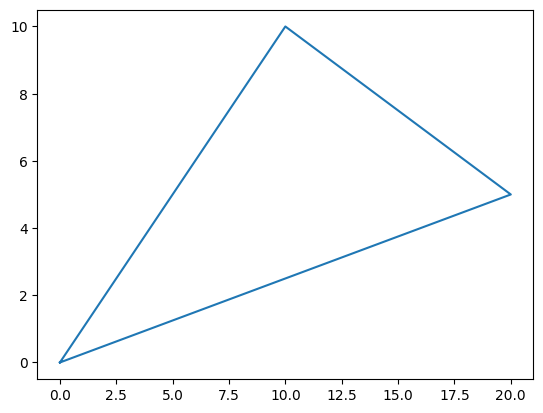

In [ ]:
X = np.array([[0,0],[10,10],[20,5], [0,0]])
plt.plot(X[:,0], X[:,1])
negative_identity = np.array([[-1,0], [0,-1]])

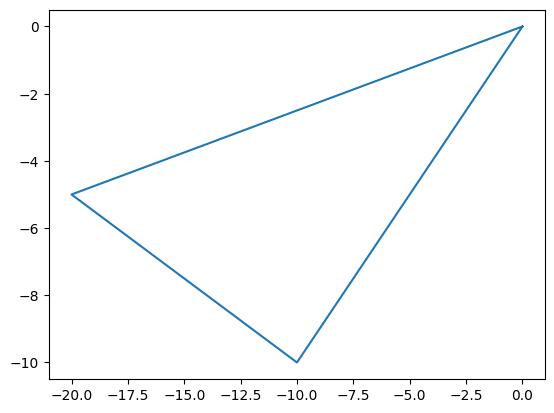

In [ ]:
def reflex(X):
  transpose_x = np.transpose(X)
  prodTranspNeg = negative_identity@transpose_x
  destranspose = np.transpose(prodTranspNeg)
  plt.plot(destranspose[:,0], destranspose[:,1])


reflex(X)

## 2.2) Calcule el promedio y desviación estandar

Calcule el promedio y desviación estándar de un vector usando únicamente operaciones matriciales.

In [ ]:
data = np.random.random([1_000_000])
promedio = np.mean(data)
size = (1_000_000,1)
array = np.ones(size)
print(array)
desvStan = ()

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


## 3.) Calcule el histograma de una imagen

Formule una función de Python que calcule el histograma de una imagen empleando el decorador JIT.

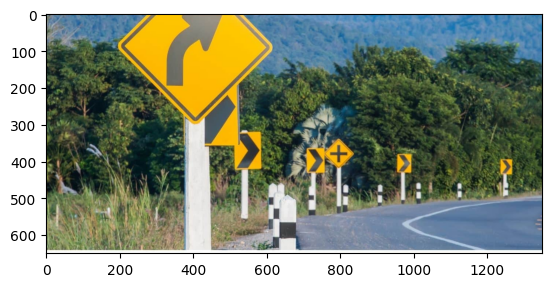

In [ ]:
img = io.imread('/content/senales-de-transito.jpg')

plt.imshow(img)
plt.show()

In [ ]:
def im_norm(im):
  im = (im - np.min(im))/(np.max(im) - np.min(im))
  return im

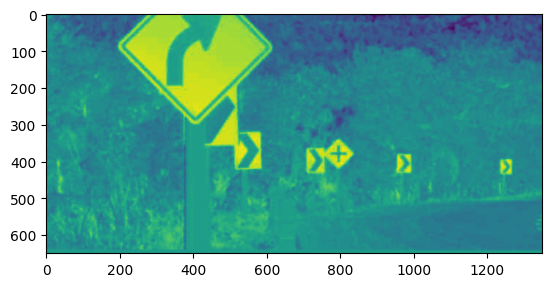

In [ ]:
specter = (im_norm(img[:,:,0]) - im_norm(img[:,:,1]))
plt.imshow(specter)

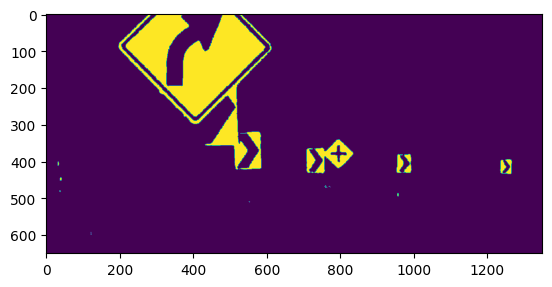

In [ ]:
def histogram(im):
  return bins, counts

In [ ]:
from numba import jit


@jit(nopython=True)
def jitconvolution2D(img, kernel):
  dims = img.shape
  convolved_img = np.zeros(dims)
  w2 = int(np.floor(kernel.shape[0]/2))

  for i in range (w2+1, dims[0]-w2):
    for j in range (w2+1, dims[1]-w2):
      w = img[i-(w2+1):i+w2, j-(w2+1):j+w2]
      value = np.sum(w * kernel)
      convolved_img[i,j]= value
  return convolved_img



def convolution2D(img, kernel):
  dims = img.shape
  convolved_img = np.zeros(dims)
  w2 = int(np.floor(kernel.shape[0]/2))

  for i in range (w2+1, dims[0]-w2):
    for j in range (w2+1, dims[1]-w2):
      w = img[i-(w2+1):i+w2, j-(w2+1):j+w2]
      value = np.sum(w * kernel)
      convolved_img[i,j]= value
  return convolved_img

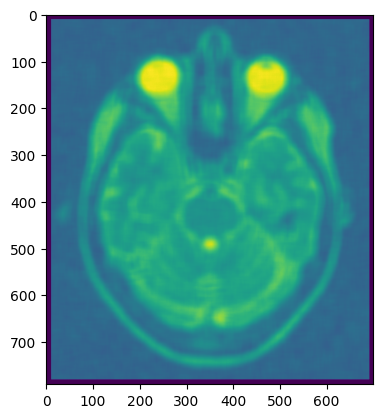

In [ ]:
n = 21
k = np.ones([n,n])/(n**2)

convolved_img = convolution2D(img_noise, k)

plt.imshow(convolved_img)

In [ ]:
%timeit jitconvolution2D(img_noise, k)

852 ms ± 5.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit convolution2D(img_noise, k)

5.1 s ± 379 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
